In [1]:
# Common imports
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import make_blobs

# To plot pretty figures
%matplotlib inline

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join('./', fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [4]:
centers = [[-5, 0], [0, 5]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.9, random_state=42)

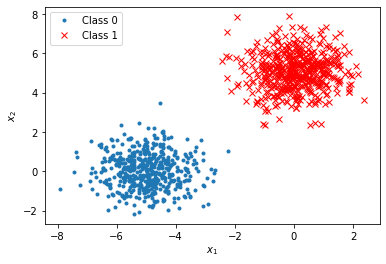

In [5]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [6]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure svm_plot1


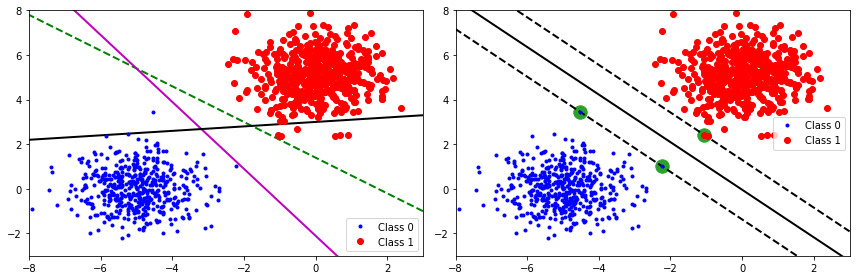

In [7]:
# Bad models
x0 = np.linspace(-9, 3, 200)
pred_1 = -0.8*x0 + 1.4
pred_2 = -1.5*x0 - 2.1
pred_3 = 0.1 * x0 + 3

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#2ca02c')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

#plt.figure(figsize=(5,7))
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "k-", linewidth=2)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label='Class 0')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro", label='Class 1')
plt.legend()
plt.axis([-8, 3, -3, 8])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, -9, 3)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label='Class 0')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro", label='Class 1')
plt.legend()
plt.axis([-8, 3, -3, 8])

save_fig("svm_plot1")
plt.show()